# Uppgift 0 - Uppvärmning
Börja med att göra explorativ dataanalys över hela datasettet. Generella frågor att besvara med hjälp av datan:

In [2]:
import pandas as pd
import numpy as np

# read first data file
df = pd.read_csv("../Project/olympicdata/athlete_events.csv")
df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [3]:
# read second data file
df1 = pd.read_csv("../Project/olympicdata/noc_regions.csv") #### NOC: National Olympic Committee
df1.head()


NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

In [4]:
# merge both the files
df_merge = df.merge(df1, on="NOC",how = "left").rename(columns={"region":"Region","notes":"Notes"})
df_merge.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal       Region Notes  
0       Basketball Men's Basketball   NaN        China   NaN  
1      Judo Men's Extra-Lightweight   NaN        China   NaN  
2           Football Men's Football   NaN      Denmark   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN  
4  Speed Skating Women's 500 metres   NaN  Netherlands   NaN

###   a. hur många länder som är med i datan?

In [5]:
result = df_merge["NOC"].unique()
print(f"The number of countries are included in the data = ", len(result))

The number of countries are included in the data =  230


###   b. vilka länder är med? (förkortningarna räcker)

In [6]:
countries = df_merge["NOC"].unique()
print(f"Countries are involved in data are  \n", countries)

Countries are involved in data are  
 ['CHN' 'DEN' 'NED' 'USA' 'FIN' 'NOR' 'ROU' 'EST' 'FRA' 'MAR' 'ESP' 'EGY'
 'IRI' 'BUL' 'ITA' 'CHA' 'AZE' 'SUD' 'RUS' 'ARG' 'CUB' 'BLR' 'GRE' 'CMR'
 'TUR' 'CHI' 'MEX' 'URS' 'NCA' 'HUN' 'NGR' 'ALG' 'KUW' 'BRN' 'PAK' 'IRQ'
 'UAR' 'LIB' 'QAT' 'MAS' 'GER' 'CAN' 'IRL' 'AUS' 'RSA' 'ERI' 'TAN' 'JOR'
 'TUN' 'LBA' 'BEL' 'DJI' 'PLE' 'COM' 'KAZ' 'BRU' 'IND' 'KSA' 'SYR' 'MDV'
 'ETH' 'UAE' 'YAR' 'INA' 'PHI' 'SGP' 'UZB' 'KGZ' 'TJK' 'EUN' 'JPN' 'CGO'
 'SUI' 'BRA' 'FRG' 'GDR' 'MON' 'ISR' 'URU' 'SWE' 'ISV' 'SRI' 'ARM' 'CIV'
 'KEN' 'BEN' 'UKR' 'GBR' 'GHA' 'SOM' 'LAT' 'NIG' 'MLI' 'AFG' 'POL' 'CRC'
 'PAN' 'GEO' 'SLO' 'CRO' 'GUY' 'NZL' 'POR' 'PAR' 'ANG' 'VEN' 'COL' 'BAN'
 'PER' 'ESA' 'PUR' 'UGA' 'HON' 'ECU' 'TKM' 'MRI' 'SEY' 'TCH' 'LUX' 'MTN'
 'CZE' 'SKN' 'TTO' 'DOM' 'VIN' 'JAM' 'LBR' 'SUR' 'NEP' 'MGL' 'AUT' 'PLW'
 'LTU' 'TOG' 'NAM' 'AHO' 'ISL' 'ASA' 'SAM' 'RWA' 'DMA' 'HAI' 'MLT' 'CYP'
 'GUI' 'BIZ' 'YMD' 'KOR' 'THA' 'BER' 'ANZ' 'SCG' 'SLE' 'PNG' 'YEM' 'IOA'
 'OMA' 'FIJ' 

### c. vilka sporter är med?

In [7]:
sports = df_merge["Sport"].unique()
print(f"Sports are included in data are \n", sports)

Sports are included in data are 
 ['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics']


### d. vilka medaljtyper finns det?


In [8]:
medals = df_merge.Medal.dropna().unique() #return this without the NaN  
print(f"Types of medal are \n", medals)

Types of medal are 
 ['Gold' 'Bronze' 'Silver']


###   e. ta reda på statistik för åldern: medelvärde, median, min, max, standardavvikelse

In [23]:
df1 = df_merge.fillna(0) # to find average value-mean
df1.head(2)

ID       Name Sex   Age  Height  Weight   Team  NOC        Games  Year  \
0   1  A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer  1992   
1   2   A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer  2012   

   Season       City       Sport                         Event Medal Region  \
0  Summer  Barcelona  Basketball   Basketball Men's Basketball     0  China   
1  Summer     London        Judo  Judo Men's Extra-Lightweight     0  China   

  Notes  
0     0  
1     0

In [10]:
mean = df1["Age"].mean() # average value of age
print(f"The mean value of Age is ", mean)

median = df1["Age"].median() # middle value of age
print(f"The median value of Age is ", median)

minimum = df["Age"].min() # minimun age
print(f"The minimum value of Age is ", minimum)

maximum = df1["Age"].max() # maximum age
print(f"The maximum value of Age is ", maximum)

standard_deviation = df1["Age"].std() # measure of how dispersed the data is in relation to the mean
print(f"The standard deviation of Age is ", standard_deviation)


The mean value of Age is  24.663826553947388
The median value of Age is  24.0
The minimum value of Age is  10.0
The maximum value of Age is  97.0
The standard deviation of Age is  7.840651650537284


In [11]:
df_merge["Age"].describe() # with out replace nan to zero

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

### f. utforska datan vidare med egna frågor

##### 1. How many number of males and females are participated?

In [12]:
print(f"Total number of athletes participated ",df_merge["Sex"].count())

Total number of athletes participated  271116


In [13]:
males = df_merge["ID"][df_merge.Sex == 'M'].count()
print(f"Number of males participated ", males)

females = df_merge["ID"][df_merge.Sex == 'F'].count()
print(f"Number of females participated ", females)

Number of males participated  196594
Number of females participated  74522


In [14]:
F = df_merge["Sex"].value_counts()['F']
M = df_merge["Sex"].value_counts()['M']
F,M

(74522, 196594)

#### 2. Which years Olympic games are held ?

In [15]:
years = df_merge["Year"].unique()
years.sort()
print(f"Olympic games years are \n",years)

Olympic games years are 
 [1896 1900 1904 1906 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956
 1960 1964 1968 1972 1976 1980 1984 1988 1992 1994 1996 1998 2000 2002
 2004 2006 2008 2010 2012 2014 2016]


#### 3. How many number of athletes with age more than 50 participated?

In [16]:
age_over50 = df_merge["ID"][df_merge["Age"] > 50].count()
print(f"Number of athletes with age more than 50 participated are ",age_over50)

Number of athletes with age more than 50 participated are  1938


#### 4. What is the maximum and minimum height and weight of a athlete?

In [17]:
maximum = df_merge[["Height", "Weight"]].max()
print(f"Maximum height and weight of athlete \n", maximum)

minimum = df_merge[["Height", "Weight"]].min()
print(f"Minimum height and weight of athlete \n", minimum)

Maximum height and weight of athlete 
 Height    226.0
Weight    214.0
dtype: float64
Minimum height and weight of athlete 
 Height    127.0
Weight     25.0
dtype: float64


## Se även till att plotta några intressanta features, exempelvis:

###  g. diagram över könsfördelningen

In [18]:
df_sex = df_merge.groupby("Sex").count()
df_sex


ID    Name     Age  Height  Weight    Team     NOC   Games    Year  \
Sex                                                                           
F     74522   74522   74098   67378   66771   74522   74522   74522   74522   
M    196594  196594  187544  143567  141470  196594  196594  196594  196594   

     Season    City   Sport   Event  Medal  Region  Notes  
Sex                                                        
F     74522   74522   74522   74522  11253   74386    901  
M    196594  196594  196594  196594  28530  196360   4138

In [19]:
df_sex["ID"]

Sex
F     74522
M    196594
Name: ID, dtype: int64

Text(0.5, 1.0, 'The total male and female athlets in Olympics')

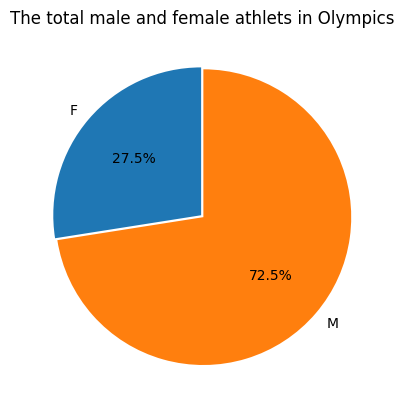

In [20]:
import matplotlib.pyplot as plt

plt.pie(x = df_sex["ID"], labels= df_sex.index, autopct="%0.1f%%", explode=[0.01, 0.01], startangle= 90)
plt.title("The total male and female athlets in Olympics")

###   h. diagram över topp 10 länder som tagit flest medaljer

In [21]:
df_merge.head(2)

ID       Name Sex   Age  Height  Weight   Team  NOC        Games  Year  \
0   1  A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer  1992   
1   2   A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer  2012   

   Season       City       Sport                         Event Medal Region  \
0  Summer  Barcelona  Basketball   Basketball Men's Basketball   NaN  China   
1  Summer     London        Judo  Judo Men's Extra-Lightweight   NaN  China   

  Notes  
0   NaN  
1   NaN

In [ ]:
pd.get_dummies()

In [22]:
df_medals = df_merge.region.value_counts().reset_index(name='Medal').head(10)
df_medals

AttributeError: 'DataFrame' object has no attribute 'region'

In [ ]:
import plotly.express as px

fig = px.bar(df_medals, x='index', y='Medal', color = 'index', labels= {"index":"region"},
title= "Top 10 countries that won the most medals")
fig.show()


###  i. plotta gärna fler saker som är intressant

In [ ]:
# using pivot_table() - to create a spreadsheet-style pivot table as a DataFrame
table =pd.pivot_table(
    df_merge,
    values="Year",
    index="region",
    columns="Medal",
    aggfunc="count",
    
    margins=True,
    
    margins_name="Total",).fillna(0) 
table.head(5)



Medal        Bronze   Gold  Silver  Total
region                                   
Afghanistan     2.0    0.0     0.0      2
Algeria         8.0    5.0     4.0     17
Argentina      91.0   91.0    92.0    274
Armenia         9.0    2.0     5.0     16
Australia     522.0  368.0   459.0   1349

In [ ]:
df_table = table.sort_values(by = "Total", ascending= False) # sorted all top  5 countries
df_table.head()

Medal     Bronze     Gold   Silver  Total
region                                   
Total    13291.0  13371.0  13112.0  39774
USA       1358.0   2638.0   1641.0   5637
Russia    1178.0   1599.0   1170.0   3947
Germany   1260.0   1301.0   1195.0   3756
UK         651.0    678.0    739.0   2068

In [ ]:
# df.iloc[row_start:row_end , col_start, col_end] - syntax
df_table= df_table.iloc[1: , :].head(5) # to eliminate first row
df_table

Medal    Bronze    Gold  Silver  Total
region                                
USA      1358.0  2638.0  1641.0   5637
Russia   1178.0  1599.0  1170.0   3947
Germany  1260.0  1301.0  1195.0   3756
UK        651.0   678.0   739.0   2068
France    666.0   501.0   610.0   1777

In [ ]:
fig = px.bar(
    df_table,
    x=df_table.index,
    y=["Bronze", "Silver", "Gold"],
    labels={"region": "countries", "value": "Number of medals"},
    title="Top 5 countries that won  all three medals",
)
fig.show()
